In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import data

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/CS116/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Split data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

Train

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

regressor2 = RandomForestRegressor()
regressor2.fit(X_train, y_train)

regressor3 = SVR(kernel='linear')
regressor3.fit(X_train, y_train)

regressor4 = SVR(kernel='rbf')
regressor4.fit(X_train, y_train)

regressor5 = SVR(kernel='poly')
regressor5.fit(X_train, y_train)

SVR(kernel='poly')

In [7]:
y_pred1 = regressor1.predict(X_test)
y_pred2 = regressor2.predict(X_test)
y_pred3 = regressor3.predict(X_test)
y_pred4 = regressor4.predict(X_test)
y_pred5 = regressor5.predict(X_test)

In [8]:
y_result1= regressor1.predict(X_val)
y_result2= regressor2.predict(X_val)
y_result3= regressor3.predict(X_val)
y_result4= regressor4.predict(X_val)
y_result5= regressor5.predict(X_val)

Loss value

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
loss_test1 = mean_squared_error(y_test,y_pred1)
loss_test1

92219531.10960242

In [11]:
loss_test2 = mean_squared_error(y_test,y_pred2)
loss_test2

66030348.22776637

In [12]:
loss_test3 = mean_squared_error(y_test,y_pred3)
loss_test3

87035018.63832097

In [13]:
loss_test4 = mean_squared_error(y_test,y_pred4)
loss_test4

1030911055.6372052

In [14]:
loss_test5 = mean_squared_error(y_test,y_pred5)
loss_test5

1027271591.0004749

In [15]:
loss_val1 = mean_squared_error(y_val,y_result1)
loss_val1

239477055.2312193

In [16]:
loss_val2 = mean_squared_error(y_val,y_result2)
loss_val2

99686407.24154662

In [17]:
loss_val3 = mean_squared_error(y_val,y_result3)
loss_val3

157394708.99098495

In [18]:
loss_val4 = mean_squared_error(y_val,y_result4)
loss_val4

930848289.7909738

In [19]:
loss_val5 = mean_squared_error(y_val,y_result5)
loss_val5

928202150.7502152

Bảng so sánh loss value:
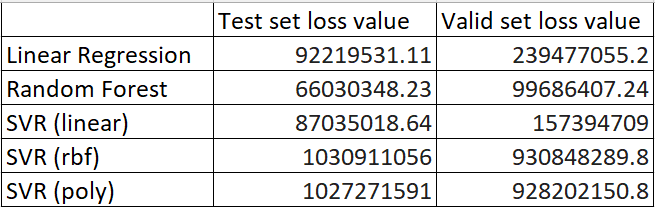

Nhận xét: Giá trị loss của các mô hình trên vẫn rất cao, nguyên nhân là vì sự thiếu dữ liệu. Tuy nhiên nhờ vậy mà việc kẻ desicion line khá dễ dàng vì rất ít điểm dữ liệu.